# Mean reversion and statistical model

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import all the unclean data for aal five stocks into separate variables 
uDataAmazon = pd.read_csv('./data/Amazon.csv', index_col = False)
uDataApple = pd.read_csv('./data/Apple.csv')
uDataGoogle = pd.read_csv('./data/Google.csv')
uDataNetflix = pd.read_csv('./data/Netflix.csv')
uDataMicrosoft = pd.read_csv('./data/Microsoft.csv')

# combine all the temp data values into a list to perform mapping operations
uDataList = [ uDataAmazon, uDataApple, uDataGoogle, uDataMicrosoft, uDataNetflix ]
uDataMicrosoft

,Open,High,Low,Close,Adj Close,Volume,Date
0,58.687500,59.312500,56.000000,58.281250,36.361576,53228400,2000-01-03
1,56.781250,58.562500,56.125000,56.312500,35.133263,54119000,2000-01-04
2,55.562500,58.187500,54.687500,56.906250,35.503712,64059600,2000-01-05
3,56.093750,56.937500,54.187500,55.000000,34.314400,54976600,2000-01-06
4,54.312500,56.125000,53.656250,55.718750,34.762833,62013600,2000-01-07
...,...,...,...,...,...,...,...
5834,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,2023-03-13
5835,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,2023-03-14
5836,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,2023-03-15
5837,265.209991,276.559998,263.279999,276.200012,276.200012,54768800,2023-03-16


In [3]:
# duplicate data count detection in data 
duplicates_per_df = [ df.duplicated().sum() for df in uDataList ]
duplicates_per_df

[0, 0, 0, 0, 0]

In [4]:
# Check for NaN values in each column of each unclean dataset
nan_counts = [ list(data.isna().sum()) for data in uDataList ]
nan_counts

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0]]

In [5]:
# do the rolling mean to show mean reversion
uDataMicrosoft['rma20'] = uDataMicrosoft['Close'].to_frame().rolling(20, min_periods=None, center=False, win_type=None, on=None).mean()
uDataMicrosoft['rma20']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5834    255.6495
5835    255.1230
5836    254.7865
5837    255.1305
5838    255.9945
Name: rma20, Length: 5839, dtype: float64

In [6]:
uDataMicrosoft['rma50'] = uDataMicrosoft['Close'].to_frame().rolling(50, min_periods=None, center=False, win_type=None, on=None).mean()
uDataMicrosoft['rma50']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5834    248.658400
5835    249.054001
5836    249.566400
5837    250.298801
5838    251.305400
Name: rma50, Length: 5839, dtype: float64

In [7]:
# rolling standard dev, and upper and lower bollingers 
uDataMicrosoft['rstd20'] = uDataMicrosoft['Close'].to_frame().rolling(20, min_periods=None, center=False, win_type=None, on=None).std()
uDataMicrosoft['rstd50'] = uDataMicrosoft['Close'].to_frame().rolling(50, min_periods=None, center=False, win_type=None, on=None).std()

# dropping the nan values to clean the data 
uDataMicrosoft.dropna(inplace=True)
uDataMicrosoft

,Open,High,Low,Close,Adj Close,Volume,Date,rma20,rma50,rstd20,rstd50
49,49.312500,49.625000,47.562500,47.562500,29.674156,73489200,2000-03-14,47.485937,50.818125,1.683825,3.598628
50,47.281250,48.312500,46.843750,47.687500,29.752150,53208000,2000-03-15,47.406250,50.606250,1.631282,3.459427
51,47.968750,48.343750,46.625000,47.687500,29.752150,77300800,2000-03-16,47.350000,50.433750,1.599323,3.383284
52,47.625000,49.750000,47.250000,49.687500,30.999954,81161600,2000-03-17,47.343750,50.289375,1.589406,3.252959
53,49.375000,49.875000,48.250000,48.687500,30.376043,47773000,2000-03-20,47.401562,50.163125,1.617368,3.188258
...,...,...,...,...,...,...,...,...,...,...,...
5834,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,2023-03-13,255.649500,248.658400,7.506738,12.318581
5835,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,2023-03-14,255.123000,249.054001,6.672754,12.385374
5836,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,2023-03-15,254.786500,249.566400,5.891843,12.524738
5837,265.209991,276.559998,263.279999,276.200012,276.200012,54768800,2023-03-16,255.130500,250.298801,6.899700,12.990879


In [8]:
# bbs
df = uDataMicrosoft.copy()
df['upper_bb_20'] = df['rma20'] + (2 * df['rstd20'])
df['lower_bb_20'] = df['rma20'] - (2 * df['rstd20'])

df['upper_bb_50'] = df['rma50'] + (2 * df['rstd50'])
df['lower_bb_50'] = df['rma50'] - (2 * df['rstd50'])

df

,Open,High,Low,Close,Adj Close,Volume,Date,rma20,rma50,rstd20,rstd50,upper_bb_20,lower_bb_20,upper_bb_50,lower_bb_50
49,49.312500,49.625000,47.562500,47.562500,29.674156,73489200,2000-03-14,47.485937,50.818125,1.683825,3.598628,50.853588,44.118287,58.015381,43.620869
50,47.281250,48.312500,46.843750,47.687500,29.752150,53208000,2000-03-15,47.406250,50.606250,1.631282,3.459427,50.668814,44.143686,57.525104,43.687396
51,47.968750,48.343750,46.625000,47.687500,29.752150,77300800,2000-03-16,47.350000,50.433750,1.599323,3.383284,50.548645,44.151355,57.200319,43.667181
52,47.625000,49.750000,47.250000,49.687500,30.999954,81161600,2000-03-17,47.343750,50.289375,1.589406,3.252959,50.522563,44.164937,56.795294,43.783456
53,49.375000,49.875000,48.250000,48.687500,30.376043,47773000,2000-03-20,47.401562,50.163125,1.617368,3.188258,50.636299,44.166826,56.539642,43.786608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,2023-03-13,255.649500,248.658400,7.506738,12.318581,270.662977,240.636024,273.295561,224.021239
5835,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,2023-03-14,255.123000,249.054001,6.672754,12.385374,268.468508,241.777493,273.824748,224.283253
5836,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,2023-03-15,254.786500,249.566400,5.891843,12.524738,266.570186,243.002814,274.615876,224.516925
5837,265.209991,276.559998,263.279999,276.200012,276.200012,54768800,2023-03-16,255.130500,250.298801,6.899700,12.990879,268.929901,241.331100,276.280559,224.317042


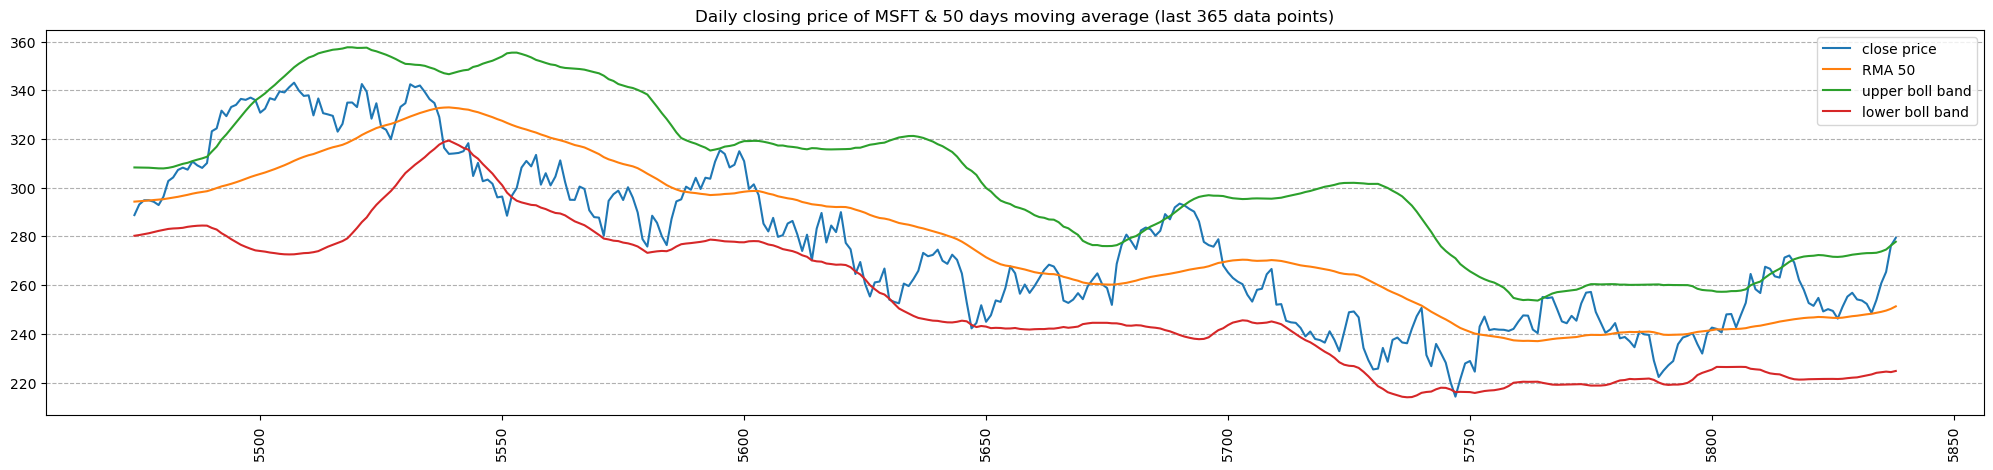

In [9]:
# zoomed in to the last year's data
# a quick plot to view the data
l = len(uDataMicrosoft)
fig = plt.figure(figsize=(25,5))
plt.plot(df.index[l-365:], df['Close'][l-365:])
plt.plot(df.index[l-365:], df['rma50'][l-365:])
plt.plot(df.index[l-365:], df['upper_bb_50'][l-365:])
plt.plot(df.index[l-365:], df['lower_bb_50'][l-365:])
plt.xticks(rotation='vertical')
plt.title('Daily closing price of MSFT & 50 days moving average (last 365 data points)')
plt.grid(which='major', axis='y', linestyle='--')
plt.legend(['close price','RMA 50','upper boll band', 'lower boll band'])
plt.show()

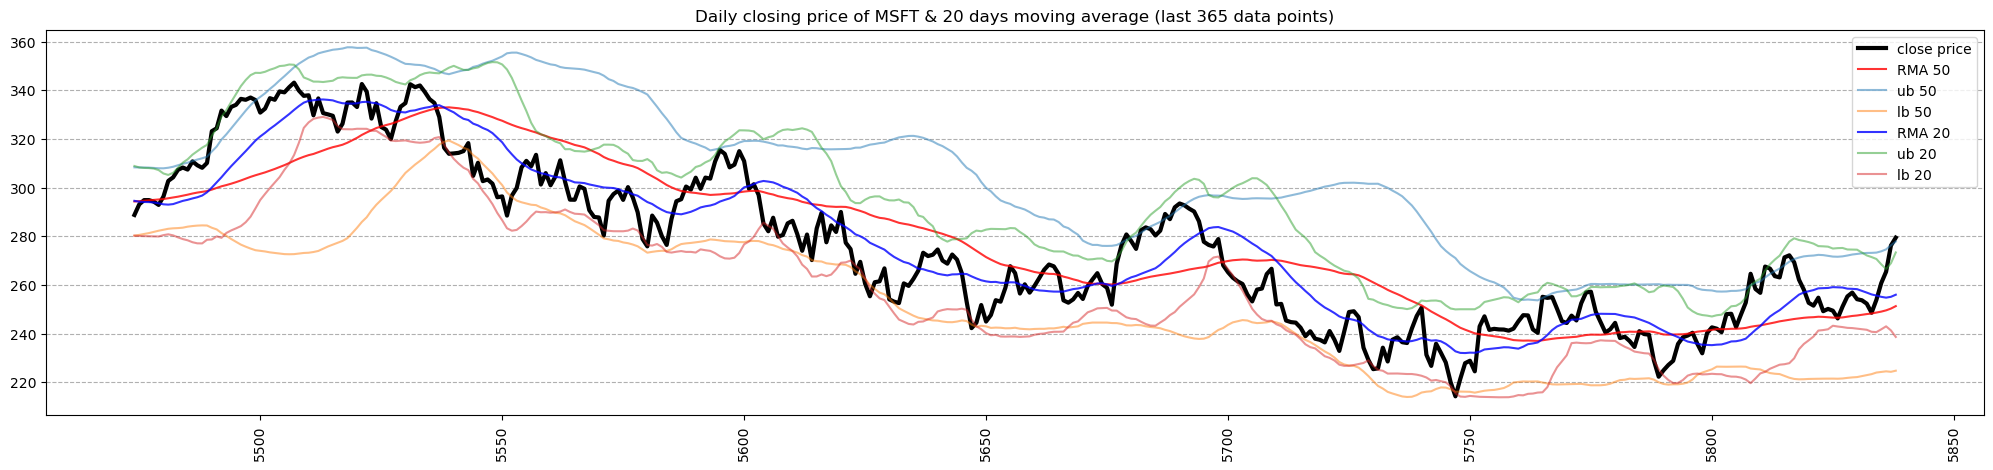

In [10]:
# zoomed in to the last year's data
# a quick plot to view the data
l = len(uDataMicrosoft)
fig = plt.figure(figsize=(25,5))
plt.plot(df.index[l-365:], df['Close'][l-365:], color='black', linewidth=3)

plt.plot(df.index[l-365:], df['rma50'][l-365:], color='red', alpha= 0.8)
plt.plot(df.index[l-365:], df['upper_bb_50'][l-365:], alpha = 0.5)
plt.plot(df.index[l-365:], df['lower_bb_50'][l-365:], alpha = 0.5)

plt.plot(df.index[l-365:], df['rma20'][l-365:], color='blue', alpha = 0.8)
plt.plot(df.index[l-365:], df['upper_bb_20'][l-365:],alpha = 0.5)
plt.plot(df.index[l-365:], df['lower_bb_20'][l-365:],alpha = 0.5)

plt.xticks(rotation='vertical')
plt.title('Daily closing price of MSFT & 20 days moving average (last 365 data points)')
plt.grid(which='major', axis='y', linestyle='--')
plt.legend(['close price','RMA 50', 'ub 50', 'lb 50', 'RMA 20', 'ub 20', 'lb 20'])
plt.show()

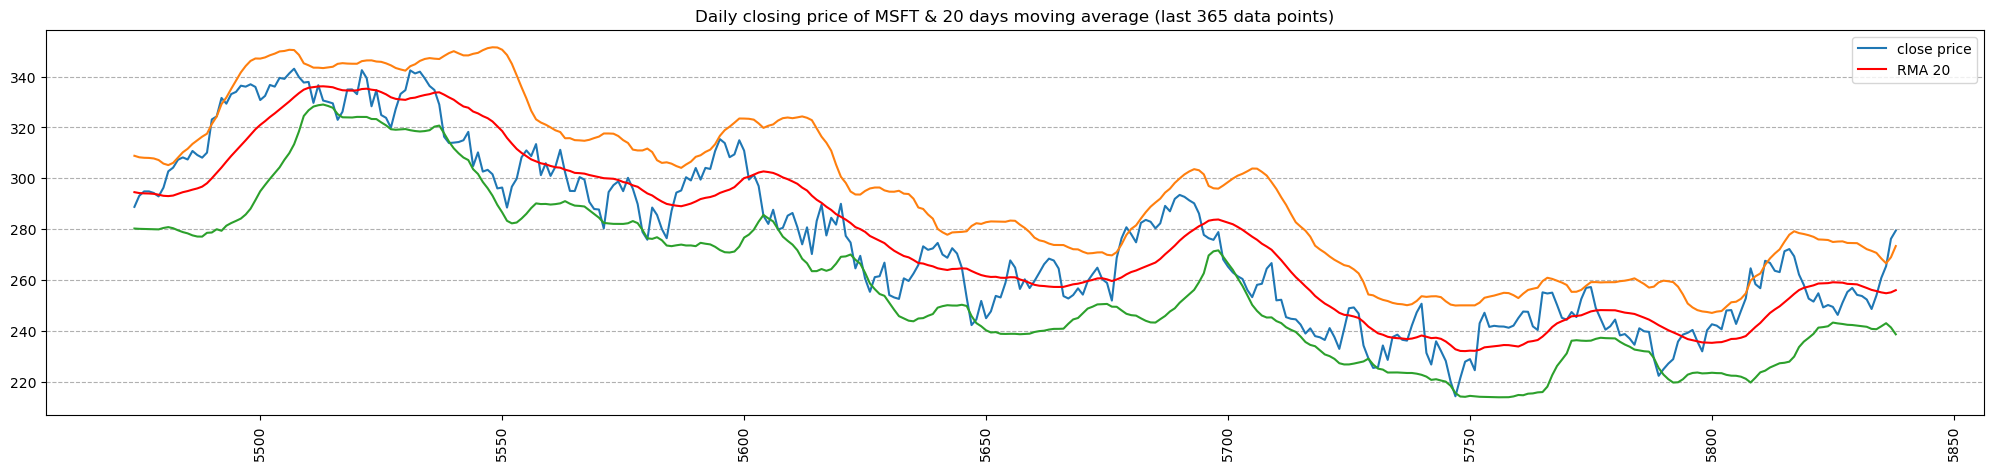

In [11]:
# mapping both 20 and 50 days boll to see how they compare
# zoomed in to the last year's data
# a quick plot to view the data
l = len(uDataMicrosoft)
fig = plt.figure(figsize=(25,5))
plt.plot(df.index[l-365:], df['Close'][l-365:])
plt.plot(df.index[l-365:], df['rma20'][l-365:], color='red')
plt.plot(df.index[l-365:], df['upper_bb_20'][l-365:])
plt.plot(df.index[l-365:], df['lower_bb_20'][l-365:])
plt.xticks(rotation='vertical')
plt.title('Daily closing price of MSFT & 20 days moving average (last 365 data points)')
plt.grid(which='major', axis='y', linestyle='--')
plt.legend(['close price','RMA 20'])
plt.show()

# set up conditions
generate buy and sell signals based on conditions.
> The main short condition here is to short the stock when crosses the upper bb and buy it back 1 std before it hits mean.
> The long condition is to buy the stock when it crosses down the lower_bb and sell it 1 std before it gets to mean.

In [12]:
# conditions in format
conditions = [
    (df['Close'] > df['upper_bb_50']) & (df['Close'] > df['rma50']),
    (df['Close'] < df['lower_bb_50']) & (df['Close'] < df['rma50'])
]

options = [df['Close'], df['Close']]

In [13]:
# generate signals
df['signal'] = np.select(conditions, options)
df

,Open,High,Low,Close,Adj Close,Volume,Date,rma20,rma50,rstd20,rstd50,upper_bb_20,lower_bb_20,upper_bb_50,lower_bb_50,signal
49,49.312500,49.625000,47.562500,47.562500,29.674156,73489200,2000-03-14,47.485937,50.818125,1.683825,3.598628,50.853588,44.118287,58.015381,43.620869,0.000000
50,47.281250,48.312500,46.843750,47.687500,29.752150,53208000,2000-03-15,47.406250,50.606250,1.631282,3.459427,50.668814,44.143686,57.525104,43.687396,0.000000
51,47.968750,48.343750,46.625000,47.687500,29.752150,77300800,2000-03-16,47.350000,50.433750,1.599323,3.383284,50.548645,44.151355,57.200319,43.667181,0.000000
52,47.625000,49.750000,47.250000,49.687500,30.999954,81161600,2000-03-17,47.343750,50.289375,1.589406,3.252959,50.522563,44.164937,56.795294,43.783456,0.000000
53,49.375000,49.875000,48.250000,48.687500,30.376043,47773000,2000-03-20,47.401562,50.163125,1.617368,3.188258,50.636299,44.166826,56.539642,43.786608,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,2023-03-13,255.649500,248.658400,7.506738,12.318581,270.662977,240.636024,273.295561,224.021239,0.000000
5835,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,2023-03-14,255.123000,249.054001,6.672754,12.385374,268.468508,241.777493,273.824748,224.283253,0.000000
5836,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,2023-03-15,254.786500,249.566400,5.891843,12.524738,266.570186,243.002814,274.615876,224.516925,0.000000
5837,265.209991,276.559998,263.279999,276.200012,276.200012,54768800,2023-03-16,255.130500,250.298801,6.899700,12.990879,268.929901,241.331100,276.280559,224.317042,0.000000


In [14]:
dft = df.replace(0, np.nan).copy()
dft

,Open,High,Low,Close,Adj Close,Volume,Date,rma20,rma50,rstd20,rstd50,upper_bb_20,lower_bb_20,upper_bb_50,lower_bb_50,signal
49,49.312500,49.625000,47.562500,47.562500,29.674156,73489200,2000-03-14,47.485937,50.818125,1.683825,3.598628,50.853588,44.118287,58.015381,43.620869,NaN
50,47.281250,48.312500,46.843750,47.687500,29.752150,53208000,2000-03-15,47.406250,50.606250,1.631282,3.459427,50.668814,44.143686,57.525104,43.687396,NaN
51,47.968750,48.343750,46.625000,47.687500,29.752150,77300800,2000-03-16,47.350000,50.433750,1.599323,3.383284,50.548645,44.151355,57.200319,43.667181,NaN
52,47.625000,49.750000,47.250000,49.687500,30.999954,81161600,2000-03-17,47.343750,50.289375,1.589406,3.252959,50.522563,44.164937,56.795294,43.783456,NaN
53,49.375000,49.875000,48.250000,48.687500,30.376043,47773000,2000-03-20,47.401562,50.163125,1.617368,3.188258,50.636299,44.166826,56.539642,43.786608,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5834,247.399994,257.910004,245.729996,253.919998,253.919998,33339700,2023-03-13,255.649500,248.658400,7.506738,12.318581,270.662977,240.636024,273.295561,224.021239,NaN
5835,256.750000,261.070007,255.860001,260.790009,260.790009,33620300,2023-03-14,255.123000,249.054001,6.672754,12.385374,268.468508,241.777493,273.824748,224.283253,NaN
5836,259.980011,266.480011,259.209991,265.440002,265.440002,46028000,2023-03-15,254.786500,249.566400,5.891843,12.524738,266.570186,243.002814,274.615876,224.516925,NaN
5837,265.209991,276.559998,263.279999,276.200012,276.200012,54768800,2023-03-16,255.130500,250.298801,6.899700,12.990879,268.929901,241.331100,276.280559,224.317042,NaN


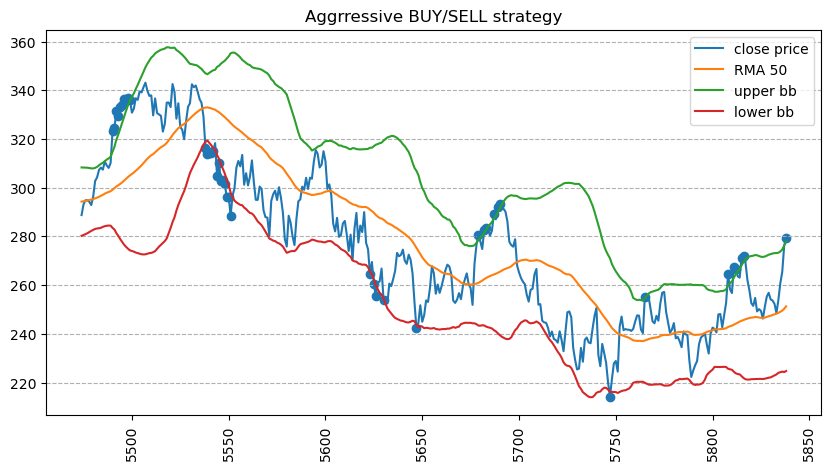

In [15]:
# zoomed in to the last year's data
# a quick plot to view the data
l = len(uDataMicrosoft)
fig = plt.figure(figsize=(10,5))
plt.plot(df.index[l-365:], dft['Close'][l-365:])
plt.plot(df.index[l-365:], dft['rma50'][l-365:])
plt.plot(df.index[l-365:], dft['upper_bb_50'][l-365:])
plt.plot(df.index[l-365:], dft['lower_bb_50'][l-365:])
plt.scatter(df.index[l-365:], dft['signal'][l-365:])

plt.xticks(rotation='vertical')
plt.title('Aggrressive BUY/SELL strategy')
plt.grid(which='major', axis='y', linestyle='--')
plt.legend(['close price','RMA 50','upper bb', 'lower bb'])
plt.show()

## Performance Testing 
> Simulation of how effective the strategies based on mean reversion would be

In [16]:
qty: float = 1.0
percent_change: float = 0
account_val = 0
init_inv = 0
in_position: bool = False

for index, row in df.iterrows():
    # print(f'index is {index} and row is {row.Close}')
    # implement the strategy
    if not in_position:
        
        # buy stocks
        if ((row.Close < row['lower bb'] ) && row.Close < row['RMA50']):
            
            print('buying stock at ', row.Close)
            in_position = not in_position

            if not init_inv:
                
                init_inv = row.Close

SyntaxError: invalid syntax (1665073471.py, line 12)